# Saving a Model

Having evaluate different models and found the best one. It is neccesary to save the best performed model to avoid re-training and for future use.
- Saving a model enables us to use it outside the trained environment (Google colab or Jupyter notebook).
- Hence, it can be deployed on web app or mobile app.

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

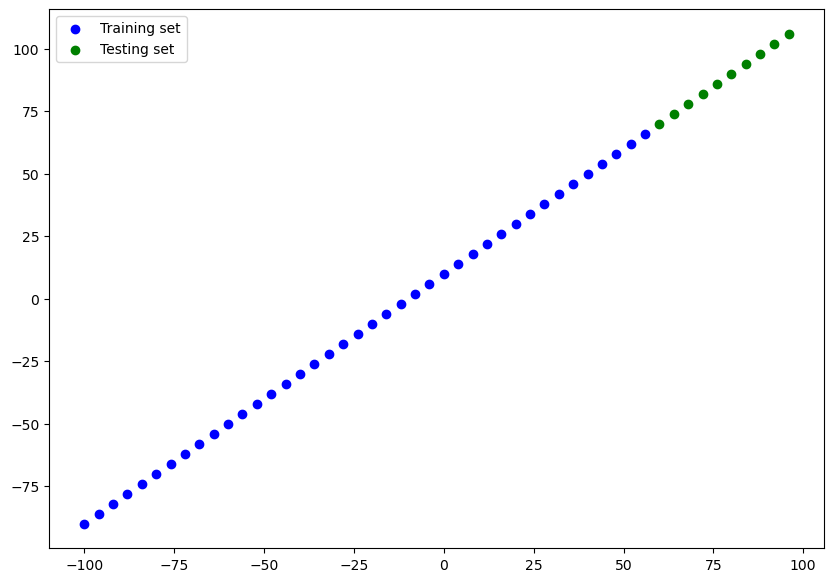

In [2]:
# X and y data
X = tf.range(-100, 100, 4)
y = X + 10

# split into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

# plot the splited sets
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, c='b', label="Training set")
plt.scatter(X_test, y_test, c='g', label="Testing set")
plt.legend()

**Model 4 performed best in the last training**

In [3]:
# random
tf.random.set_seed(42)

# 1. build the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# 2. compile model
model_4.compile(loss=tf.keras.losses.mae, 
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['mae']
               )

# 3. fit model
model_4.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 10ms/step - loss: 35.0011 - mae: 35.0011
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 25.9035 - mae: 25.9035
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 17.2051 - mae: 17.2051
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 9.3482 - mae: 9.3482
Epoch 5/100
2/2 [==============================] - 0s 5ms/step - loss: 9.9882 - mae: 9.9882
Epoch 6/100
2/2 [==============================] - 0s 6ms/step - loss: 13.4096 - mae: 13.4096
Epoch 7/100
2/2 [==============================] - 0s 4ms/step - loss: 15.1367 - mae: 15.1367
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 14.8052 - mae: 14.8052
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 13.2941 - mae: 13.2941
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2231 - mae: 11.2231
Epoch 11/100
2/2 [==============================] - 0s 6ms/ste

Epoch 89/100
2/2 [==============================] - 0s 5ms/step - loss: 0.6979 - mae: 0.6979
Epoch 90/100
2/2 [==============================] - 0s 5ms/step - loss: 0.4650 - mae: 0.4650
Epoch 91/100
2/2 [==============================] - 0s 6ms/step - loss: 0.8736 - mae: 0.8736
Epoch 92/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2859 - mae: 0.2859
Epoch 93/100
2/2 [==============================] - 0s 5ms/step - loss: 2.1574 - mae: 2.1574
Epoch 94/100
2/2 [==============================] - 0s 6ms/step - loss: 0.9998 - mae: 0.9998
Epoch 95/100
2/2 [==============================] - 0s 5ms/step - loss: 0.7489 - mae: 0.7489
Epoch 96/100
2/2 [==============================] - 0s 4ms/step - loss: 0.3185 - mae: 0.3185
Epoch 97/100
2/2 [==============================] - 0s 5ms/step - loss: 0.3748 - mae: 0.3748
Epoch 98/100
2/2 [==============================] - 0s 4ms/step - loss: 0.2608 - mae: 0.2608
Epoch 99/100
2/2 [==============================] - 0s 5ms/step - loss

In [4]:
y_pred_4 = model_4.predict(X_test)
y_pred_4

1/1 [==============================] - 0s 87ms/step


array([[ 70.38089 ],
       [ 74.40471 ],
       [ 78.42853 ],
       [ 82.45236 ],
       [ 86.47618 ],
       [ 90.500015],
       [ 94.523834],
       [ 98.54766 ],
       [102.57149 ],
       [106.595314]], dtype=float32)

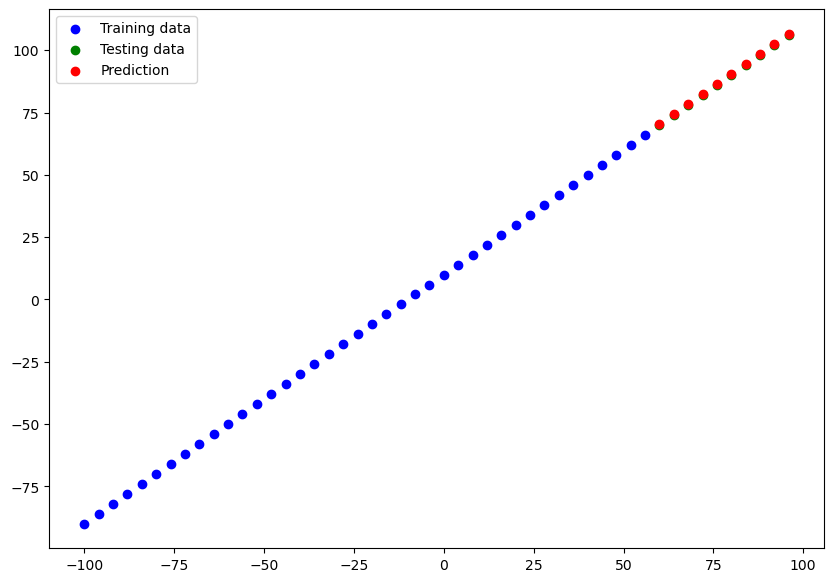

In [5]:
# visualize using a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred_4):
    """
    plot training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # plot model prediction
    plt.scatter(test_data, predictions, c="r", label="Prediction")
    # show legend
    plt.legend();
    
plot_predictions()

In [6]:
y_pred_4 = model_4.predict(X_test)
y_pred_4 = tf.squeeze(tf.constant(y_pred_4))
y_pred_4

1/1 [==============================] - 0s 22ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.38089 ,  74.40471 ,  78.42853 ,  82.45236 ,  86.47618 ,
        90.500015,  94.523834,  98.54766 , 102.57149 , 106.595314],
      dtype=float32)>

In [7]:
mae_4 = tf.keras.losses.mae(y_test, y_pred_4)
mae_4

<tf.Tensor: shape=(), dtype=float32, numpy=0.48809814>

In [8]:
mse_4 = tf.keras.losses.mse(y_test, y_pred_4)
mse_4

<tf.Tensor: shape=(), dtype=float32, numpy=0.24292287>

## Save the model

There are two formats to save a tensorflow model.
1. **SavedModelFormat:** Model saved in this format can be restored using `tf.keras.models.load_model`
2. **HDF5 format:** It has the extension `.h5`

In [9]:
# Save model format

model_4.save("saved_model")

INFO:tensorflow:Assets written to: saved_model\assets


INFO:tensorflow:Assets written to: saved_model\assets
